In [1]:
import numpy as np

### Load our pretrained model

In [2]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

In [3]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


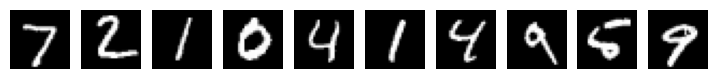

In [4]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

313/313 [==============================] - 2s 4ms/step


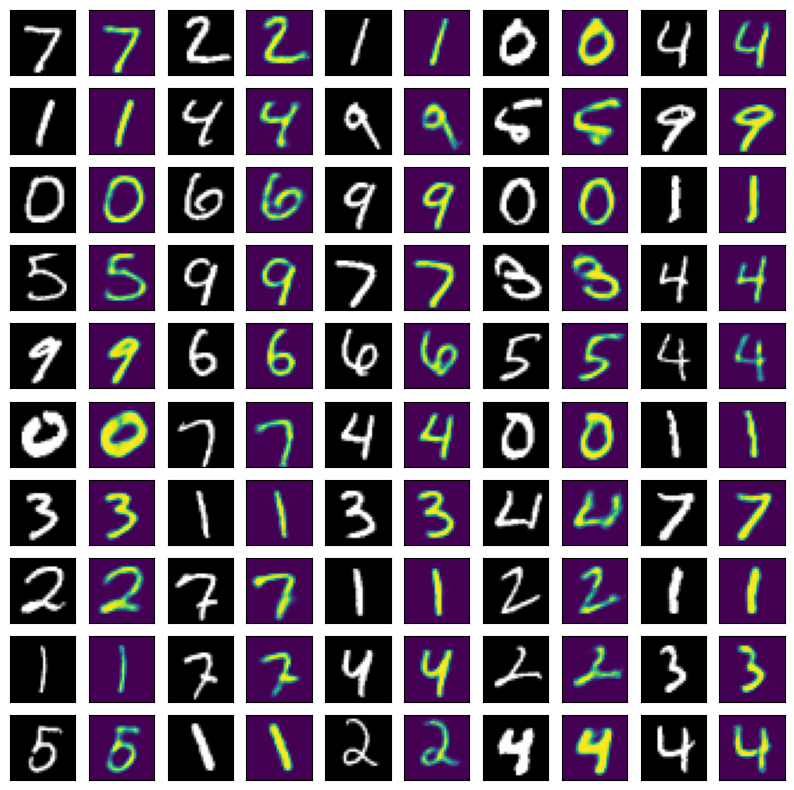

In [5]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

### About Data
We had initially trained an autoencoder, with MNIST dataset, and we had Displayed the predictions for several random digits, comparing these to the original we can see that the predictions are pretty good & identifying the digits is good.
Autoencoders have a wide range of applications, including image and audio compression, anomaly detection, and data generation. In this exercise, we will compress and reconstruct images using autoencoders. We will use the MNIST dataset to train an autoencoder, which consists of 28x28 grayscale images of handwritten digits, and then use it to reconstruct random digits as well as a new character that we will add to the dataset.

In [6]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 16)                1616      
                                                                 
 dense_4 (Dense)             (None, 100)               1700      
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

In [7]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=train_images, # For autoencoders, both the input and the target are the same
    y=train_images, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(test_images, test_images),
    callbacks=[early_stop]
)



Epoch 1/10
469/469 [==============================] - 17s 33ms/step - loss: 0.1936 - val_loss: 0.1365
Epoch 2/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1286 - val_loss: 0.1190
Epoch 3/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1152 - val_loss: 0.1104
Epoch 4/10
469/469 [==============================] - 14s 30ms/step - loss: 0.1093 - val_loss: 0.1068
Epoch 5/10
469/469 [==============================] - 17s 37ms/step - loss: 0.1060 - val_loss: 0.1045
Epoch 6/10
469/469 [==============================] - 16s 34ms/step - loss: 0.1037 - val_loss: 0.1026
Epoch 7/10
469/469 [==============================] - 14s 29ms/step - loss: 0.1019 - val_loss: 0.1013
Epoch 8/10
469/469 [==============================] - 15s 33ms/step - loss: 0.1005 - val_loss: 0.1001
Epoch 9/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0994 - val_loss: 0.0993
Epoch 10/10
469/469 [==============================] - 16s 35ms/step - loss: 0.098

In [8]:
autoencoder.save('new_trained_autoencoder.h5')

In [9]:
# We have created a new autoencoder, and trained this autoencoder with the MNIST dataset,and also with my new images added we had also oversampled these images. 

1/1 [==============================] - 0s 153ms/step
(1, 784)


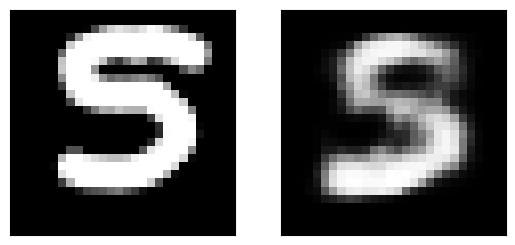

In [10]:
from PIL import Image
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
updated_model = keras.models.load_model('new_trained_autoencoder.h5')


####################################
# load a sample image
image = tf.keras.utils.load_img('sampleimage1.png', target_size=(28, 28), color_mode = "grayscale")
image2=tf.keras.utils.load_img('sampleimage2.png',target_size=(28, 28), color_mode = "grayscale")
image3=tf.keras.utils.load_img('sampleimage3.png',target_size=(28, 28), color_mode = "grayscale")
image4=tf.keras.utils.load_img('sampleimage4.png',target_size=(28, 28), color_mode = "grayscale")
image5=tf.keras.utils.load_img('sampleimage5.png',target_size=(28, 28), color_mode = "grayscale")
####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr=tf.keras.utils.img_to_array(image2)
input_arr=tf.keras.utils.img_to_array(image3)
input_arr=tf.keras.utils.img_to_array(image4)
input_arr=tf.keras.utils.img_to_array(image5)
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image5, cmap="gray")


plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions[0].reshape(28,28), cmap="gray")


plt.show()



In [11]:
from tensorflow import keras

# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

input_arr = input_arr.reshape(784)

np.random.shuffle(train_images)

bad_images = [input_arr for _ in range(5000)]
new_image_set = np.vstack((train_images[:50000], bad_images))
np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = updated_model.fit(
    x=new_images_train, # For autoencoders, both the input and the target are the same
    y=new_images_train, 
    epochs=50, 
    batch_size=128,
    shuffle=True, 
    validation_data=(new_images_test, new_images_test),
    callbacks=[early_stop]
)

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)
Epoch 1/50
86/86 [==============================] - 7s 63ms/step - loss: 0.0994 - val_loss: 0.0974
Epoch 2/50
86/86 [==============================] - 5s 62ms/step - loss: 0.0962 - val_loss: 0.0972
Epoch 3/50
86/86 [==============================] - 5s 62ms/step - loss: 0.0956 - val_loss: 0.0971
Epoch 4/50
86/86 [==============================] - 5s 61ms/step - loss: 0.0950 - val_loss: 0.0966
Epoch 5/50
86/86 [==============================] - 5s 62ms/step - loss: 0.0945 - val_loss: 0.0970
Epoch 6/50
86/86 [==============================] - 5s 64ms/step - loss: 0.0941 - val_loss: 0.0970
Epoch 7/50
86/86 [==============================] - 6s 65ms/step - loss: 0.0936 - val_loss: 0.0968
Epoch 8/50
86/86 [==============================] - 6s 64ms/step - loss: 0.0933 - val_loss: 0.0968
Epoch 9/50
86/86 [==============================] - 5s 62ms/step - loss: 0.0929 - val_loss: 0.0968
Epoch 10/50
86/86 [==============================] 

313/313 [==============================] - 2s 6ms/step


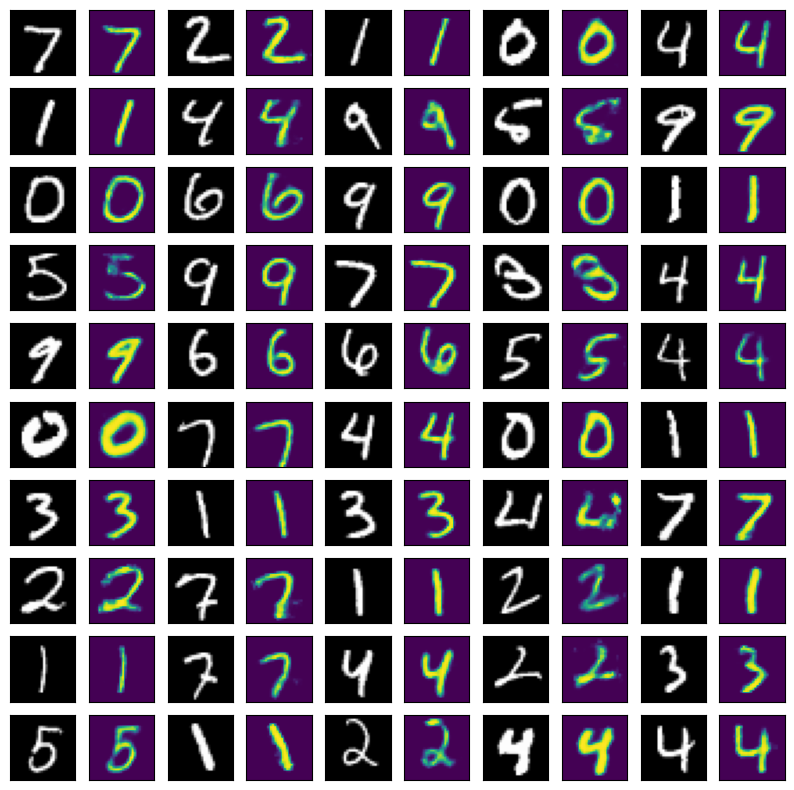

In [12]:
reconstructed_images = updated_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

1/1 [==============================] - 0s 28ms/step
(1, 784)


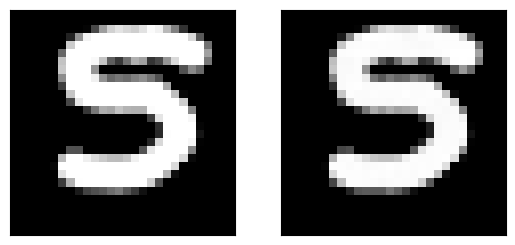

In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image


####################################
# load a sample image



image = tf.keras.utils.load_img('sampleimage1.png', target_size=(28, 28), color_mode = "grayscale")

image2=tf.keras.utils.load_img('sampleimage2.png',target_size=(28, 28), color_mode = "grayscale")
image3=tf.keras.utils.load_img('sampleimage3.png',target_size=(28, 28), color_mode = "grayscale")
image4=tf.keras.utils.load_img('sampleimage4.png',target_size=(28, 28), color_mode = "grayscale")
image5=tf.keras.utils.load_img('sampleimage5.png',target_size=(28, 28), color_mode = "grayscale")
####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr=tf.keras.utils.img_to_array(image2)
input_arr=tf.keras.utils.img_to_array(image3)
input_arr=tf.keras.utils.img_to_array(image4)
input_arr=tf.keras.utils.img_to_array(image5)

####################################
# predict an image from this sample
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)


#####################################
# display the two images side by side
# 
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image5, cmap="gray")





plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions.reshape(28,28), cmap="gray")


plt.show()


1/1 [==============================] - 0s 45ms/step
(1, 784)


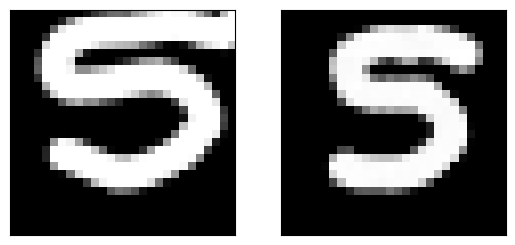

In [14]:

image = tf.keras.utils.load_img('sampleimage1.png', target_size=(28, 28), color_mode = "grayscale")

image2=tf.keras.utils.load_img('sampleimage2.png',target_size=(28, 28), color_mode = "grayscale")
image3=tf.keras.utils.load_img('sampleimage3.png',target_size=(28, 28), color_mode = "grayscale")
image4=tf.keras.utils.load_img('sampleimage4.png',target_size=(28, 28), color_mode = "grayscale")
image5=tf.keras.utils.load_img('sampleimage5.png',target_size=(28, 28), color_mode = "grayscale")
####################################
# predict an image from this sample
input_arr = tf.keras.utils.img_to_array(image)
input_arr=tf.keras.utils.img_to_array(image2)
input_arr=tf.keras.utils.img_to_array(image3)
input_arr=tf.keras.utils.img_to_array(image4)
input_arr=tf.keras.utils.img_to_array(image5)

####################################
# predict an image from this sample
input_arr = input_arr/ 255 # normalize between 0 and 1
input_arr = input_arr.reshape(784)
input_arr = np.array([input_arr])  # Convert single image to a batch with one image in it

predictions = updated_model.predict(input_arr)
print(predictions.shape)

plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(image4, cmap="gray")

plt.subplot(1,2,2)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(predictions.reshape(28,28), cmap="gray")


plt.show()

## Conclusion
In this exercise, we have reconstructed images of handwritten digits from the MNIST dataset using a sequential Keras autoencoder. In addition, we will augment the dataset by adding new images of different characters and training a new autoencoder on the augmented dataset. We will be able to demonstrate the effectiveness of our new autoencoder in reconstructing both the original digits and the new character as a result of this.

One of the primary benefits of autoencoders is their ability to learn a compressed representation of the input data that can then be used for a variety of downstream tasks such as classification or anomaly detection. Autoencoders can also be used in generative modeling, which aims to produce new data that is similar to the training data.

As my name starts with Letter S, Initially I had created 5 images with letter S. This was later trained in the autoencoder with enough samples and later combined with the mnist dataset.
To add a new character to the MNIST dataset, we can create several versions of the character and oversample them by adding enough copies to the dataset so that the model can learn to identify and reconstruct the new character. We can then train a new autoencoder on the augmented dataset, which includes both the original MNIST digits and the new character.
Finally, we can demonstrate the effectiveness of our new autoencoder by showing that it can successfully reconstruct a random set of digits as well as the new character that we added to the dataset.
We can observe that the model is able to classify the letter & identify it that it is infact the letter S.